In [1]:
# ---------------- AIRLINE CREW SCHEDULING ----------------

MIN_REST = 1  # hour

flights = [
    ("F1",9,11),
    ("F2",10,12),
    ("F3",13,15),
    ("F4",16,18),
    ("F5",17,19),
    ("F6",20,22),
]

crew = {"C1":[], "C2":[], "C3":[]}

def valid(assignments, crew_id, new):
    new_id, ns, ne = new
    for f in assignments[crew_id]:
        _, s, e = f
        if max(ns,s) < min(ne,e):
            return False
        if 0 <= ns-e < MIN_REST or 0 <= s-ne < MIN_REST:
            return False
    return True

def solve(i, flights, assignments):
    if i == len(flights):
        return assignments
    for c in assignments:
        if valid(assignments, c, flights[i]):
            assignments[c].append(flights[i])
            res = solve(i+1, flights, assignments)
            if res: return res
            assignments[c].pop()
    return None

sol = solve(0, flights, crew)
print(sol)


{'C1': [('F1', 9, 11), ('F3', 13, 15), ('F4', 16, 18), ('F6', 20, 22)], 'C2': [('F2', 10, 12), ('F5', 17, 19)], 'C3': []}


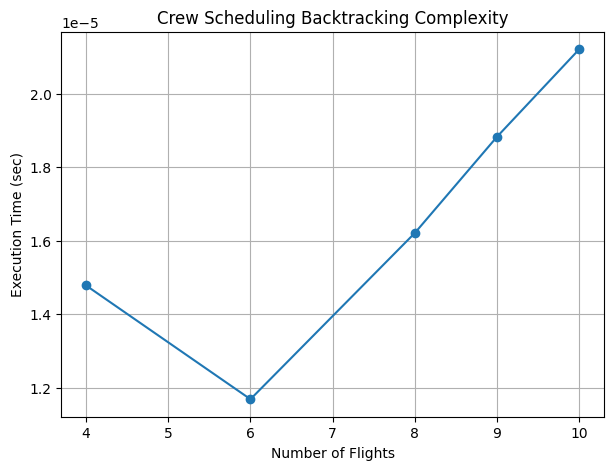

In [3]:


import time
import matplotlib.pyplot as plt

MIN_REST = 1

def valid(assign, crew_id, new):
    _,ns,ne = new
    for f in assign[crew_id]:
        _,s,e = f
        if max(ns,s) < min(ne,e): return False
        if 0 <= ns-e < MIN_REST: return False
        if 0 <= s-ne < MIN_REST: return False
    return True

def solve(i, flights, assign):
    if i==len(flights): return True
    for c in assign:
        if valid(assign,c,flights[i]):
            assign[c].append(flights[i])
            if solve(i+1, flights, assign): return True
            assign[c].pop()
    return False

def time_function(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

flight_counts = [4,6,8,9,10]
times = []

for fc in flight_counts:
    flights=[]
    start=8
    for i in range(fc):
        s=start
        e=s+1
        flights.append((f"F{i}",s,e))
        start+=2
    assign={"C1":[],"C2":[],"C3":[]}
    t=time_function(solve,0,flights,assign)
    times.append(t)

plt.figure(figsize=(7,5))
plt.plot(flight_counts, times, marker='o')
plt.xlabel("Number of Flights")
plt.ylabel("Execution Time (sec)")
plt.title("Crew Scheduling Backtracking Complexity")
plt.grid(True)
plt.show()

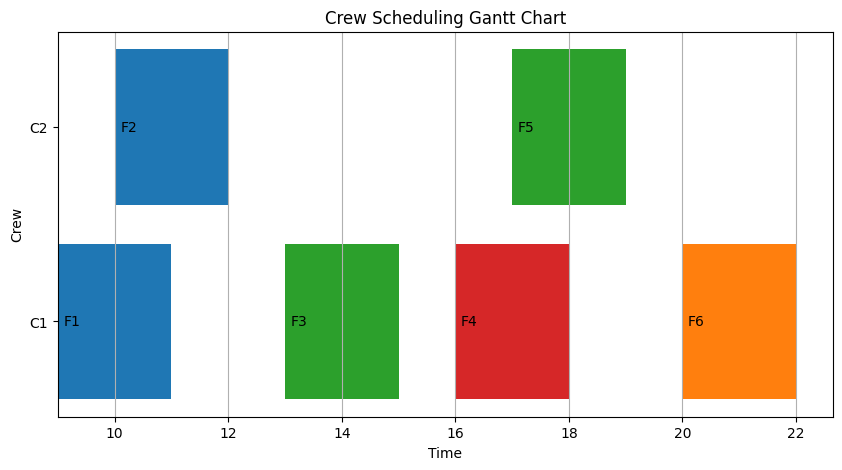

In [4]:


crew_solution = {
    "C1":[("F1",9,11),("F3",13,15),("F4",16,18),("F6",20,22)],
    "C2":[("F2",10,12),("F5",17,19)],
    "C3":[]
}

plt.figure(figsize=(10,5))

colors=["tab:blue","tab:green","tab:red","tab:orange","tab:purple","tab:cyan"]

i=0
for crew in crew_solution:
    for idx,f in enumerate(crew_solution[crew]):
        _,s,e = f
        plt.barh(crew, e-s, left=s, color=colors[idx%len(colors)])
        plt.text(s+0.1, crew, f[0], va='center')

plt.xlabel("Time")
plt.ylabel("Crew")
plt.title("Crew Scheduling Gantt Chart")
plt.grid(True, axis="x")
plt.show()
